In [47]:
#Q1
import numpy as np

#####################################################################################
#                              bisection method
#####################################################################################
def bisection_method(f, a, b, eps, maxiter):
    if abs(f(a))<eps:
        #print('root is ',a)
        return a
    elif abs(f(b))<eps:
        #print('root is ',b)
        return b
    elif f(a)*f(b)>0:
        print('bad interval')
        return None
    else:
        c=0
        m = 0.5*(a+b)
        while abs(f(m))>eps and c<maxiter:
            print("%2d %10.6f %10.6f %10.6f %10.6f"%(c,a,b,m,f(m)))
            if f(m)*f(a)<0:
                b = m
            else:
                a = m
            m = 0.5*(a+b)
            c +=1
        if c==maxiter:
            print("Did not converge")
            return None
        else:
            #print("The root is ",m)
            return m 
        

####################################################################################
#                       newton rapson method ( tangent method)
#####################################################################################
def newton_rapson_method(f,df,x0,eps,maxiter):
    if abs(f(x0))<eps:
        #print('root is ',x0)
        return x0
    elif abs(df(x0))<eps:
        print('flat function')
        return None
    else:
        c = 0
        x1 = x0 - (f(x0)/df(x0))
        while abs(f(x1))>eps and c<maxiter:
            print("%2d %10.6f %10.6f %10.6f"%(c,x0,x1,f(x1)))
            x0 = x1
            if abs(df(x0))<eps:
                print('flat function')
                break
                return None
            c +=1
            x1 = x0 - (f(x0)/df(x0))
        if c==maxiter:
            print("Did not converge")
            return None
        else:
            #print('root is ', x1)
            return x1

        
#####################################################################################
#                               secant method
######################################################################################
def secant_method(f,x0,x1,eps,maxiter):
    if abs(f(x0))<eps:
        #print('root is ',x0)
        return x0
    elif abs(f(x1))<eps:
        #print('root is ',x1)
        return x1
    elif abs(f(x0)-f(x1))<eps:
        print('flat function')
        return None
    else:
        c = 0
        x2 = x0 - f(x0)*((x1-x0)/(f(x1)-f(x0)))
        while abs(f(x2))>eps and c<maxiter:
            print("%2d %10.6f %10.6f %10.6f %10.6f"%(c,x0,x1,x2,f(x2)))
            x0,x1 = x1,x2
            if abs(f(x0)-f(x1))<eps:
                print('flat function')
                break
                return None
            c +=1
            x2 = x0 - f(x0)*((x1-x0)/(f(x1)-f(x0)))
        if c ==maxiter:
            print('did not converged')
            return None
        else:
            #print('root is ',x2)
            return x2

# defining my function
from math import tan
def f(x):
    return tan(x) - 3*x

def df(x):
    return 1/(np.cos(x)**2) -3

print("by Bisection method, root is ", bisection_method(f,a=1.1,b=1.4,eps = 1e-8,maxiter=100))
print('by newton rapson method, root is ', newton_rapson_method(f,df,x0=1.2,eps = 1e-8,maxiter=100))
print('by secant method, root is ', secant_method(f,x0=1.2,x1=1.3,eps = 1e-8,maxiter=100))


        

 0   1.100000   1.400000   1.250000  -0.740430
 1   1.250000   1.400000   1.325000   0.011145
 2   1.250000   1.325000   1.287500  -0.427568
 3   1.287500   1.325000   1.306250  -0.227290
 4   1.306250   1.325000   1.315625  -0.113368
 5   1.315625   1.325000   1.320312  -0.052510
 6   1.320312   1.325000   1.322656  -0.021042
 7   1.322656   1.325000   1.323828  -0.005040
 8   1.323828   1.325000   1.324414   0.003030
 9   1.323828   1.324414   1.324121  -0.001011
10   1.324121   1.324414   1.324268   0.001008
11   1.324121   1.324268   1.324194  -0.000002
12   1.324194   1.324268   1.324231   0.000503
13   1.324194   1.324231   1.324213   0.000251
14   1.324194   1.324213   1.324203   0.000125
15   1.324194   1.324203   1.324199   0.000062
16   1.324194   1.324199   1.324197   0.000030
17   1.324194   1.324197   1.324195   0.000014
18   1.324194   1.324195   1.324195   0.000006
19   1.324194   1.324195   1.324195   0.000002
20   1.324194   1.324195   1.324194   0.000000
21   1.324194

In [23]:
#Q2

#equilibrium , F = - dv/dx =0

def f(x):
    return (4*x**3 + 3*x**2 + 2*x**1 + 1)

def df(x):
    return (12*x**2 + 6*x**1 + 2)

print('root is ', newton_rapson_method(f,df,-0.5,1e-8,100) )

root is  -0.6058295861886113


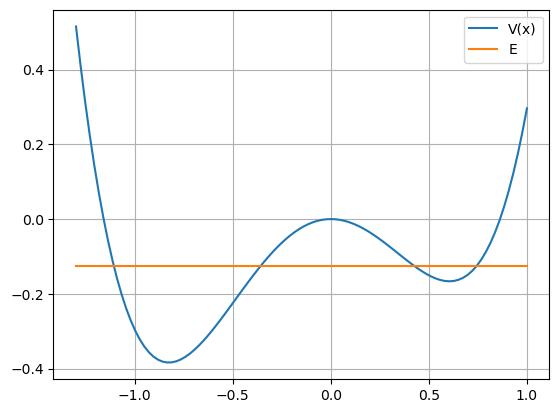

In [36]:
#Q3
import matplotlib.pyplot as plt

def v(x):
    return x**4 + (2*x/3)**3 -x**2 

E = -0.125 #ev
xs = np.linspace(-1.3,1,100)
a = np.zeros(len(xs))
for i in range(len(xs)):
    a[i] = E
    
plt.plot(xs,v(xs),label='V(x)')
plt.plot(xs,a, label = 'E')
plt.legend()
plt.grid()

In [46]:
# now defing a function for finding the root V(x) +|E|

def f(x):
    return  x**4 + (2*x/3)**3 -x**2 +0.125

##using bisection
a = bisection_method(f,-1,-2,1e-8,100)
b =  bisection_method(f,-0.5,-0.2,1e-8,100)
print('from bisection method, turning points in first well ',round(a,5),',',round(b,5))
c = bisection_method(f,0.5,0.2,1e-8,100)
d = bisection_method(f,1,0.6,1e-8,100)
print('turning points in 2nd well ',round(c,5),',',round(d,5))
print(' ')

##using secant
a = secant_method(f,-1,-2,1e-8,100)
b =  secant_method(f,-0.5,-0.2,1e-8,100)
print('from secant method, turning points in first well ',round(a,5),',',round(b,5))
c = secant_method(f,0.5,0.2,1e-8,100)
d = secant_method(f,1,0.6,1e-8,100)
print('turning points in 2nd well ',round(c,5),',',round(d,5))

from bisection method, turning points in first well  -1.10732 , -0.35748
turning points in 2nd well  0.42434 , 0.74417
 
from secant method, turning points in first well  -1.10732 , -0.35748
turning points in 2nd well  0.42434 , 0.74417
